Mean Absolute Error: 9379.569630610362


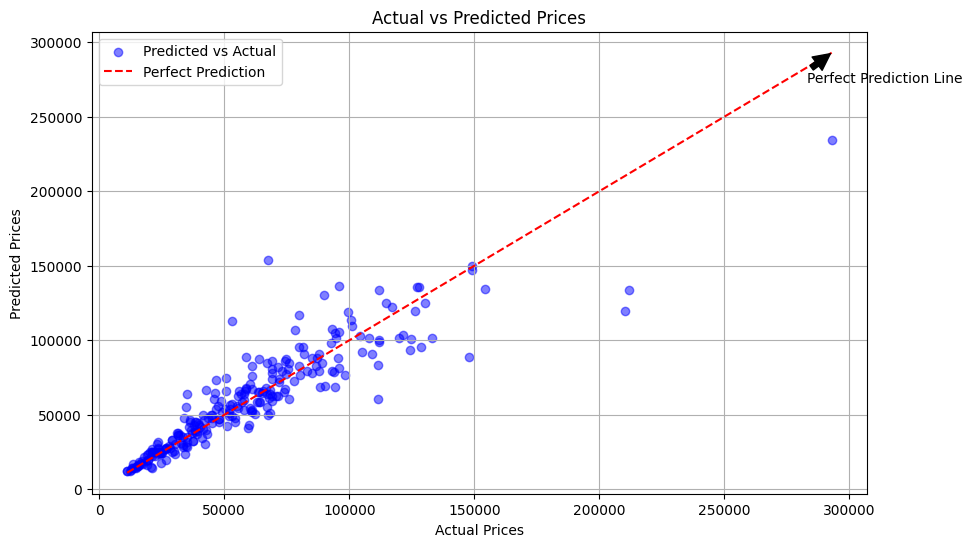

In [4]:
# Jupyter Notebook code for training a machine learning model

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_path = "../data/laptopData_table_cleaned.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
df.head()

# Define features and target
X = df.drop("Price", axis=1)
y = df["Price"]

# Preprocessing for numerical data
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Save the model
joblib.dump(model, "laptop_price_model.pkl")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))

# Scatter plot with two colors
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', label='Predicted vs Actual')

# Add a line for perfect predictions
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)

# Add annotations for better understanding
plt.annotate('Perfect Prediction Line', xy=(max_val, max_val), xytext=(max_val-10000, max_val-20000),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()